In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

: 

Using Google Colab, a line of code was used to import(upload) file from local drive to the server after which the dataset read.

In [ ]:
df = pd.read_csv('tested.csv')

#To display the first few rows to inspect the data I use the below
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


When working on a dataset the first step is checking and eliminating null values, We can simply do this by finding null and replacing with average of each columns. Also, we can remove columns which are not needed such as the Names, etc.

In [ ]:
def clean(df):
    df = df.drop(["Cabin","Name","PassengerId"],axis=1)
    cols = ["SibSp","Parch","Fare","Age"]
    for col in cols:
        df[col].fillna(df[col].median(),inplace=True)
    df.Embarked.fillna("U",inplace=True)
    return df
df = clean(df)

In [ ]:
df.describe().columns   #Used to check column arrangement

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

To calculate basic statistical summary for all columns I used the "describe" function which returns count,mean,max amongst others

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.info() # This is used to check the data type of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


This is used to create two dataframe from an existing dataframe (df_num and df_cat)


In [ ]:
df_num = df[['Age','Fare','SibSp','Parch']]
df_cat = df[['Survived','Pclass','Sex','Embarked']]

This loops through a created dataframe df_num which then creates a series of histograms visualizing the distribution of numerical values within a single column which allows exploration of the spread, central tendency, and potential outliers in the numerical data.

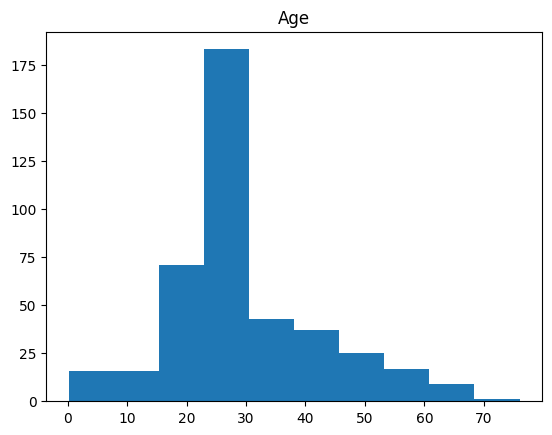

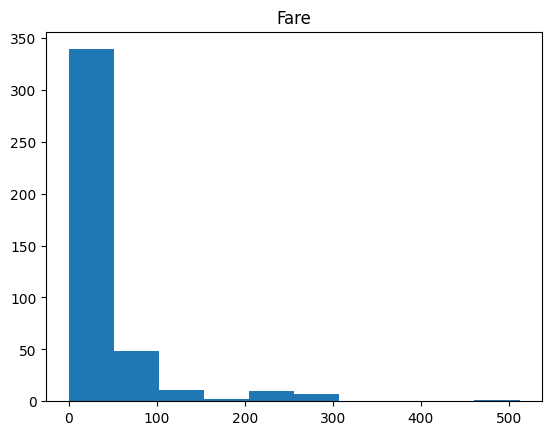

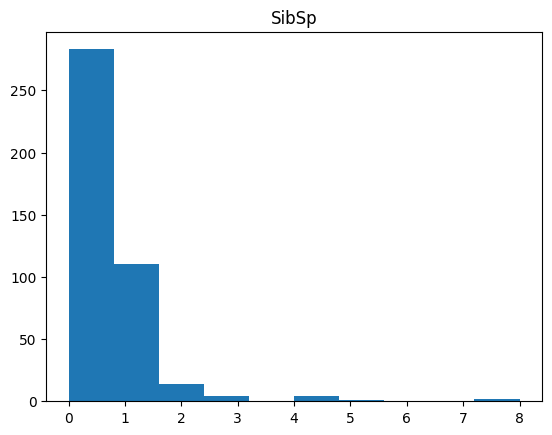

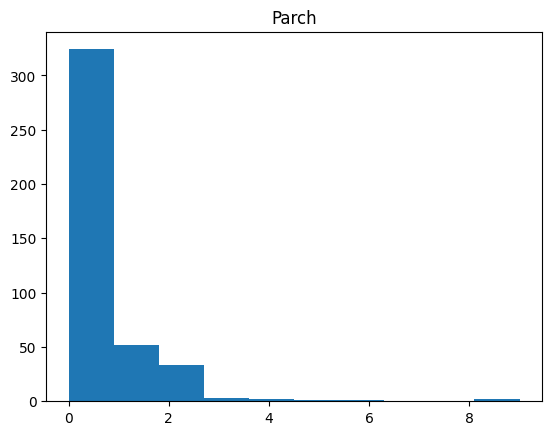

In [ ]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age      Fare     SibSp     Parch
Age    1.000000  0.342357 -0.071197 -0.043731
Fare   0.342357  1.000000  0.171912  0.230325
SibSp -0.071197  0.171912  1.000000  0.306895
Parch -0.043731  0.230325  0.306895  1.000000


<Axes: >

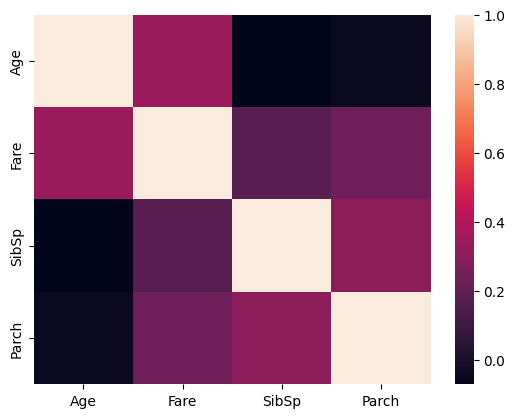

In [ ]:
#This used to show the correlation between each columns.
print(df_num.corr())
sns.heatmap(df_num.corr())

In [ ]:
pd.pivot_table(df,index="Survived",values=['Age','Fare','SibSp','Parch']) #This is used to check the average survival against different categories such as Age and Fare

,Age,Fare,Parch,SibSp
Survived,,,,
0,29.522218,27.478728,0.274436,0.379699
1,29.734145,49.747699,0.598684,0.565789


This loops through the categorical columns in DataFrame named df_cat and creates separate bar charts for each column visualizing the distribution of values within a single categorical column of the DataFrame df_cat. It allows you to quickly visualize the data distribution across different categorical variables.

<ipython-input-22-eae035175d8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts(), palette='viridis').set_title(i)


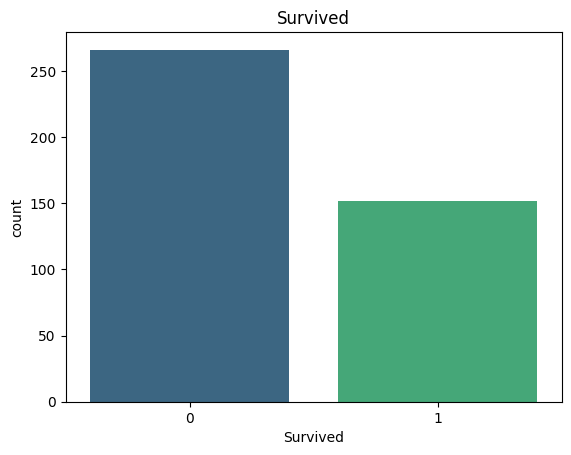

<ipython-input-22-eae035175d8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts(), palette='viridis').set_title(i)


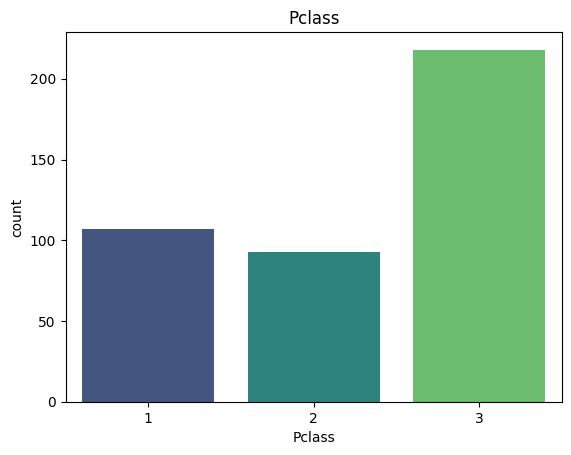

<ipython-input-22-eae035175d8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts(), palette='viridis').set_title(i)


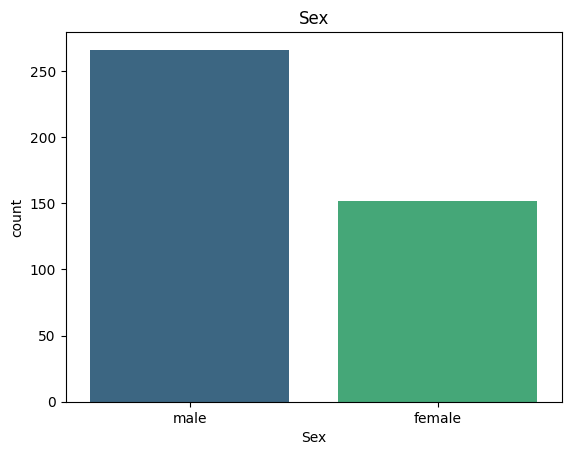

<ipython-input-22-eae035175d8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts(), palette='viridis').set_title(i)


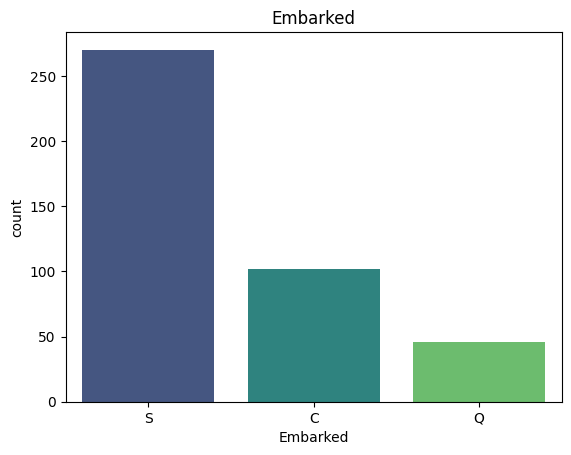

In [ ]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts(), palette='viridis').set_title(i)
    plt.show()

Groups the data by Survivors and non-survivors for each Pclass,Sex and Embarked.
Overall, these pivot tables provide insights into how survival rates were affected by passenger class, gender, and embarkation port on the Titanic.

In [ ]:
print(pd.pivot_table(df,index="Survived",columns='Pclass',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(df,index="Survived",columns='Sex',values='Ticket',aggfunc='count',fill_value=0))
print()
print(pd.pivot_table(df,index="Survived",columns='Embarked',values='Ticket',aggfunc='count'))
print()

Pclass     1   2    3
Survived             
0         57  63  146
1         50  30   72

Sex       female  male
Survived              
0              0   266
1            152     0

Embarked   C   Q    S
Survived             
0         62  22  182
1         40  24   88



By creating a list called age_bins, we then create a dataframe called Age Group which is used to calculate survival across different age brackets.

Survived     0   1
Age Group         
<18         30  24
18-25       56  32
25-40      133  66
40-60       40  26
60+          7   4



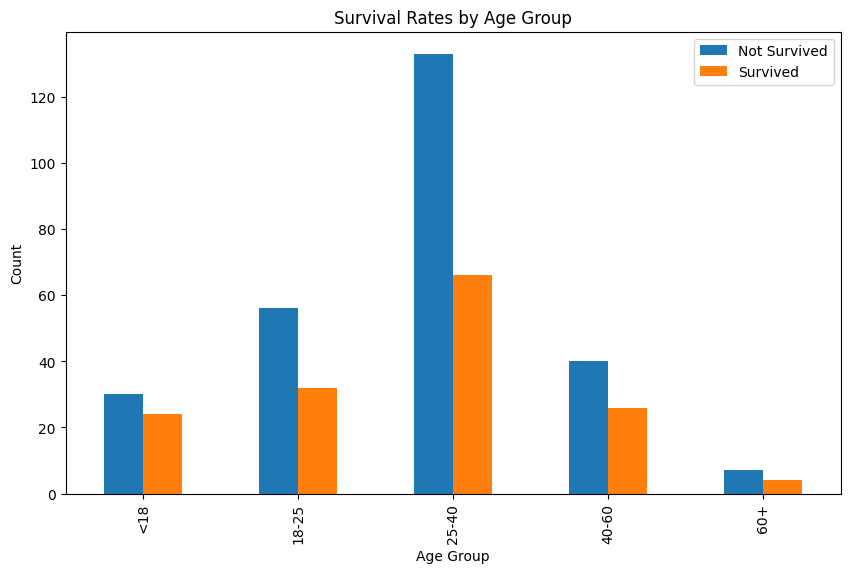

In [ ]:
age_bins = [0, 18,25, 40, 60, 100]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=['<18','18-25','25-40', '40-60', '60+'])
print(pd.pivot_table(df, index='Age Group', columns='Survived', values='Ticket',aggfunc='count'))
print()

pivot_table = pd.pivot_table(df, index='Age Group', columns='Survived', values='Ticket', aggfunc='count', fill_value=0)

# Create the bar chart
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


By using the groupby function and the mean function,to get the average survival rates based on gender and passenger class, a Bar chart was used for visualization

Pclass  Sex   
1       female    1.0
        male      0.0
2       female    1.0
        male      0.0
3       female    1.0
        male      0.0
Name: Survived, dtype: float64


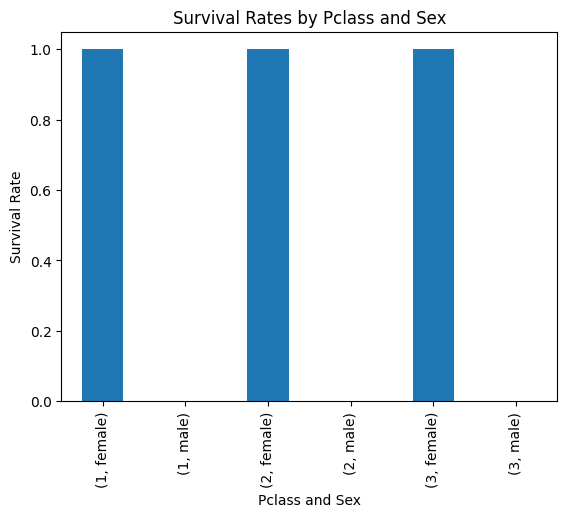

In [ ]:
grouped_data = df.groupby(['Pclass', 'Sex'])
survival_rates = grouped_data['Survived'].mean()
print(survival_rates)

survival_rates.plot(kind='bar')
plt.title('Survival Rates by Pclass and Sex')
plt.xlabel('Pclass and Sex')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols=["Sex","Embarked"]
for col in cols:
    df[col] = le.fit_transform(df[col])
    print(le.classes_)
df.head()

['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df["Survived"]
x = df.drop("Survived",axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=1000).fit(x_train,y_train)

In [ ]:
predictions = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

1.0